In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')
sms=pd.read_csv("/content/drive/MyDrive/spamSMS.csv", encoding="utf-8")
sms.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Class,input Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
sms.shape


(5574, 2)

In [7]:
sms['Class'].value_counts()

ham     4827
spam     747
Name: Class, dtype: int64

In [8]:
print('Spam Ratio = ',np.round(len(sms[sms["Class"]=='spam'])/len(sms['Class']),2)*100)
print('Ham Ratio = ',np.round(len(sms[sms["Class"]=='ham'])/len(sms['Class']),2)*100)

Spam Ratio =  13.0
Ham Ratio =  87.0


In [9]:
#replacing Class name ham to 0 and Spam to 1
sms['Class'].replace({'ham':0,'spam':1}, inplace = True)

In [10]:
sms.head()

,Class,input Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
sms.groupby("Class").describe()

input Text                                                            \
           count unique                                                top   
Class                                                                        
0           4827   4518                             Sorry, I'll call later   
1            747    653  Please call our customer service representativ...   

            
      freq  
Class       
0       30  
1        4

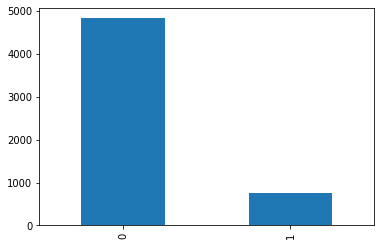

In [12]:
sms.Class.value_counts().plot.bar();

In [13]:
sms['length']=sms['input Text'].str.len();

In [14]:
sms.head();

In [15]:
#Getting rid of Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw=set(stopwords.words('english')+['u','ū','ur','im','dont','doin','ure'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
sms['input Text']=sms['input Text'].apply(lambda x: ' '.join(term for term in x.split() if term not in sw))

In [17]:
#New Column lenght after removing stopwords
sms['new_length']=sms['input Text'].str.len();

In [18]:
#as we can see that the lenght has changed after removiung the stopwords
sms.head()

,Class,input Text,length,new_length
0,0,"Go jurong point, crazy.. Available bugis n gre...",111,91
1,0,Ok lar... Joking wif oni...,29,27
2,1,Free entry 2 wkly comp win FA Cup final tkts 2...,155,141
3,0,U dun say early hor... U c already say...,49,41
4,0,"Nah I think goes usf, lives around though",61,41


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


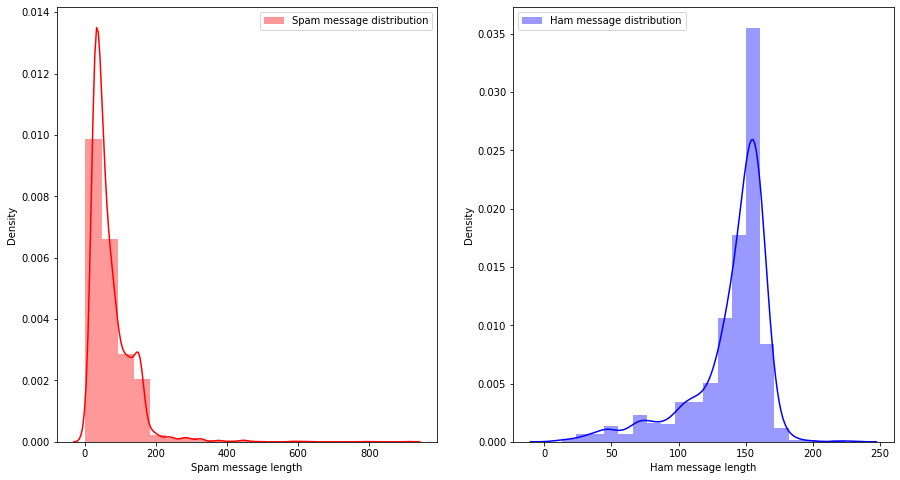

In [19]:
#Display Spam and Ham messages Distribution before removing the stopwords by plotiing the graph 
f,ax=plot.subplots(1,2,figsize=(15,8));

sns.distplot(sms[sms['Class']==0]['length'],bins=20,ax=ax[0],label='Spam message distribution',color='r');

ax[0].set_xlabel('Spam message length');
ax[0].legend();

sns.distplot(sms[sms['Class']==1]['length'],bins=20,ax=ax[1],label='Ham message distribution',color='b');

ax[1].set_xlabel('Ham message length');
ax[1].legend();

plot.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


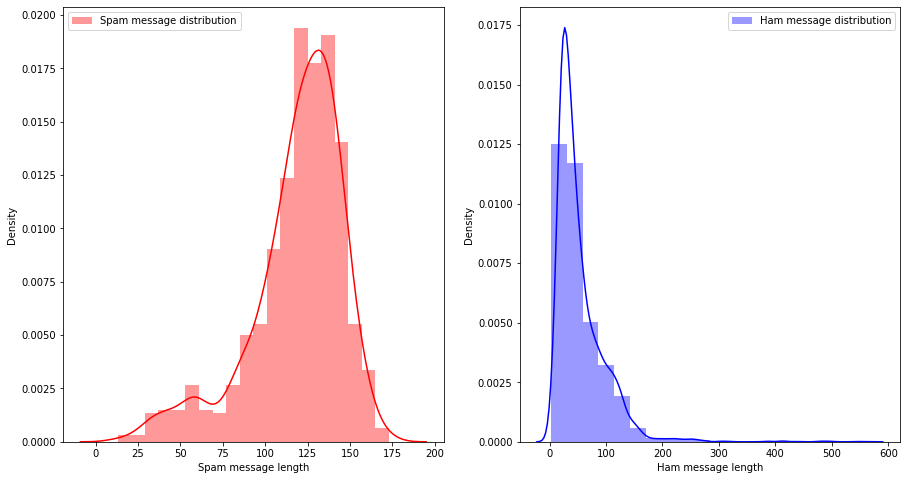

In [20]:
#Display Spam and Ham messages Distribution after removing the stopwords by plotiing the graph 
f,ax=plot.subplots(1,2,figsize=(15,8))

sns.distplot(sms[sms['Class']==1]['new_length'],bins=20,ax=ax[0],label='Spam message distribution',color='r')

ax[0].set_xlabel('Spam message length')
ax[0].legend()

sns.distplot(sms[sms['Class']==0]['new_length'],bins=20,ax=ax[1],label='Ham message distribution',color='b')

ax[1].set_xlabel('Ham message length')
ax[1].legend()

plot.show()